In [26]:
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sns

Define the problem parameters such as n = number of nodes 
			, adj = adjacency matrix of the graph
      , Graph_edge = array of graphs - this will simplify the graph visualization process - 
And lastly defualt_n_community = number of communities 
 
```
class Problem:
	def __init__(self, n, adj, graph_edge, default_n_community):
		self.n = n
		self.adj = adj
		self.m = int(sum([len(x) for x in self.adj])/2)
		self.default_n_community = default_n_community
		self.graph_edge = graph_edge
```

We want to create a random first population and improve on this. To this we first shuffle the array list then we will iterate on it. In each iteration we will choose members of a community randomly and assign their community to them. Done by this section of the code : 
 
```````````
  selected = random.choices(vertices, k=int(self.n / self.default_n_community))
          vertices = [e for e in vertices if e not in selected]
          for i in selected:
            individual_map[i] = counter
          counter += 1 
```````````


Keep in mind in the last iteration there is only one possible community to assign the remaining nodes

In the end we will sort the randomly generated populations based on the fitness function. We can see the formula and code below : 



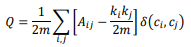
 


```
self.population = sorted(self.population, key=lambda agent: self.fitness(
			agent), reverse=False)
```
subsequently the function which is calculating the fitness can be seen below


```
	def fitness(self, individual):
		# Calculate the fitness of a chromosome based on the formula provided   
		Q = 0
		for i in range(self.n):
			for j in range(self.n):
				Q += (int(j in self.adj[i]) - ((len(self.adj[i]) * len(self.adj[j])) / (2 * self.m))) * int(individual[0][i] == individual[0][j])
		Q /= (2 * self.m)
		
		individual[1] = Q
		return Q
```

Now for the algorithm :
In each step we will select a random number of candidates for parents(tournement_size) then choose the best "parent_size" based on fitness function. 

This part is done by the selection function : 

```
	def selection(self):
		random.shuffle(self.population)
		self.parents = self.population[:self.tournament_size]
		self.parents = sorted(self.parents, key=lambda agent: self.fitness(
			agent), reverse=True)[:self.parents_size]
```

Of the selected parents candidates, we will randomly link pairs of them and then we will create two “children” of the pairs selected and create new offspring with a uniform crossover method.

```
	def breed(self, parent1, parent2):
		# We will breed new children based on single point corssover
		child1 = [None, None]
		child2 = [None, None]
		temp1 = []
		temp2 = []
		for i in range(len(parent1[0])):
			choose = random.randint(1, 2)
			if choose == 1: 
				temp1.append(parent1[0][i]) 
				temp2.append(parent2[0][i]) 
			else : 
				temp1.append(parent2[0][i]) 
				temp2.append(parent1[0][i])
		child1[0] = temp1
		child2[0] = temp2
		return child1, child2

	def breed_offsprings(self):
		self.children = []
		# Select two parent for breeding two children
		for _ in range(self.breed_rate):
			random.shuffle(self.parents)
			for i in range(int(len(self.parents)/2)):
				child1, child2 = self.breed(self.parents[i], self.parents[len(self.parents)-i-1])
				self.children.append(child1)
				self.children.append(child2)
```

We will mutate some of the children based on our mutation rate so we could avoid getting stuck at local minimas 

```
	def mutate(self, individual):
		# we will randomly mutate some genes based on out mutation rate 
		individual_copy = [individual[0][:], None]
		# Choosing wheter to mutate or not 
		if random.random() < self.mutation_rate:
			# Changing a gene to another possible answer
			gene = random.choice(range(self.n))
			cluster = random.choice(list(set(individual[0])))
	 		# We need to make sure we don't randomly select the first one :)
			while cluster == individual[0][gene]:
				cluster = random.choice(list(set(individual[0])))
			individual_copy[0][gene] = cluster
		self.fitness(individual_copy)
		return individual_copy
```

Finally we will select the best of the parents, children and mutated children and repeat the process on the chosen ones. 

```
def replacement(self):
		# We will consider the best of the children, mutated and parent and then select the best of them based on fitness function
		self.mutated_children = sorted(
			self.mutated_children, key=lambda agent: agent[1], reverse=True)
		self.population = sorted(
			self.parents, key=lambda agent: agent[1], reverse=True)

		self.population = self.mutated_children[:-self.elite_size] + self.parents[:self.elite_size]
		self.population = sorted(
                    self.population, key=lambda agent: self.fitness(agent), reverse=True)
```

In [27]:
import random
import copy
from itertools import combinations
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ALPHABET = "abcdefghijklmnopqrstuvwxyz"

class Problem:
	def __init__(self, n, adj, graph_edge, default_n_community):
		self.n = n
		self.adj = adj
		self.m = int(sum([len(x) for x in self.adj])/2)
		self.default_n_community = default_n_community
		self.graph_edge = graph_edge
	
	def initial_population(self):
		self.population = []
		# We want to create a number of populations
		for _ in range(self.population_size):

			# For each one we will randomly put the nodes on a community
			
			vertices = list(range(self.n))
			random.shuffle(vertices)
			individual_map = [None for _ in range(self.n)]
			
			counter = 0
			
			while len(vertices) != 0:
				if len(vertices) < int(self.n / self.default_n_community):
					selected = vertices[:]
					for i in selected:
						selected = vertices[:]
						for i in selected: 
							individual_map[i] = counter
					counter += 1
					break
				else:
					selected = random.choices(vertices, k=int(self.n / self.default_n_community))
					vertices = [e for e in vertices if e not in selected]
					for i in selected:
						individual_map[i] = counter
					counter += 1
			self.population.append([individual_map,None])
			
		self.population = sorted(self.population, key=lambda agent: self.fitness(agent), reverse=False)
	
	def fitness(self, individual):
		# Calculate the fitness of a chromosome based on the formula provided   
		Q = 0
		for i in range(self.n):
			for j in range(self.n):
				Q += (int(j in self.adj[i]) - ((len(self.adj[i]) * len(self.adj[j])) / (2 * self.m))) * int(individual[0][i] == individual[0][j])
		Q /= (2 * self.m)
		
		individual[1] = Q
		return Q
		
	def selection(self):
		random.shuffle(self.population)
		self.parents = self.population[:self.tournament_size]
		self.parents = sorted(self.parents, key=lambda agent: self.fitness(
			agent), reverse=True)[:self.parents_size]
	
	def breed(self, parent1, parent2):
		# We will breed new children based on single point corssover
		child1 = [None, None]
		child2 = [None, None]
		temp1 = []
		temp2 = []
		for i in range(len(parent1[0])):
			choose = random.randint(1, 2)
			if choose == 1: 
				temp1.append(parent1[0][i]) 
				temp2.append(parent2[0][i]) 
			else : 
				temp1.append(parent2[0][i]) 
				temp2.append(parent1[0][i])
		child1[0] = temp1
		child2[0] = temp2
		return child1, child2

	def breed_offsprings(self):
		self.children = []
		# Select two parent for breeding two children
		for _ in range(self.breed_rate):
			random.shuffle(self.parents)
			for i in range(int(len(self.parents)/2)):
				child1, child2 = self.breed(self.parents[i], self.parents[len(self.parents)-i-1])
				self.children.append(child1)
				self.children.append(child2)


		
	def mutate(self, individual):
		# we will randomly mutate some genes based on out mutation rate 
		individual_copy = [individual[0][:], None]
		# Choosing wheter to mutate or not 
		if random.random() < self.mutation_rate:
			# Changing a gene to another possible answer
			gene = random.choice(range(self.n))
			cluster = random.choice(list(set(individual[0])))
	 		# We need to make sure we don't randomly select the first one :)
			while cluster == individual[0][gene]:
				cluster = random.choice(list(set(individual[0])))
			individual_copy[0][gene] = cluster
		self.fitness(individual_copy)
		return individual_copy
		
	def mutate_offsprings(self):
		# Return the mutation which were formed
		self.mutated_children = []
		for individual in self.children:
			self.mutated_children.append(self.mutate(individual))
		return self.mutated_children
	
	def replacement(self):
		# We will consider the best of the children, mutated and parent and then select the best of them based on fitness function
		self.mutated_children = sorted(
			self.mutated_children, key=lambda agent: agent[1], reverse=True)
		self.population = sorted(
			self.parents, key=lambda agent: agent[1], reverse=True)

		self.population = self.mutated_children[:-self.elite_size] + self.parents[:self.elite_size]
		self.population = sorted(
                    self.population, key=lambda agent: self.fitness(agent), reverse=True)
	
	def evaluate(self):
		pop_fitness = [agent[1] for agent in self.population]
	
		return sum(pop_fitness), min(pop_fitness)

	def graph_visulization(self):
		fig2, ax2 = plt.subplots()
		ax2.set_title('Communities')
		G = nx.Graph()	
		G.add_edges_from(self.graph_edge)	
		color_map = [node for node in self.population[-1:][0]]
		nx.draw_networkx(G, node_color = color_map[0])

	
	def GA(self, population_size, tournament_size, parents_size, mutation_rate, elite_size, n_generations):
		self.population_size = population_size
		self.tournament_size = tournament_size
		self.parents_size = parents_size
		self.breed_rate = int(self.population_size/self.parents_size)
		self.mutation_rate = mutation_rate
		self.elite_size = elite_size
		self.n_generations = n_generations
		# Make the random first population 
		self.initial_population()
		plotFitness = []
		plotEpoch = []
		plotPopFit = []
		for epoch in range(self.n_generations):
			# Select a random number of candidates for parents(tournement_size) then choose the best "parent_size" based on fitness function 
			self.selection()
			# Create children from the chosen parents
			self.breed_offsprings()
	 		# Mutate some of them
			self.mutate_offsprings()
			# Select the best of them (population_size)
			self.replacement()
			eval_ = self.evaluate()
	 		# Save the parameters so we can plot them later
			plotFitness.append(eval_[1])
			plotEpoch.append(epoch)
			plotPopFit.append(eval_[0])  
			print("Epoch", epoch, ":\tPopulation total fitness:", eval_[0], "\tBest fitness:", eval_[1])
		# Create a graph of the process 
		fig, ax = plt.subplots()
		ax.scatter(plotEpoch, plotPopFit, color = 'r')
		ax.set_title('Population Total Fitness')
		ax.set_xlabel('Generation')
		ax.set_ylabel('Population Total Fitness')
		sns.scatterplot(x=plotEpoch, y=plotPopFit)
	
		fig1, ax1 = plt.subplots()
		ax1.scatter(plotEpoch, plotFitness, color = 'b')
		ax1.set_title('Population Best Fitness')
		ax1.set_xlabel('Generation')
		ax1.set_ylabel('Population Best Fitness')
		sns.scatterplot(x=plotEpoch, y=plotFitness)

		print("Final : ", ":\tPopulation total fitness:", plotPopFit[:-1], "\tBest fitness:", plotFitness[:-1])
		self.graph_visulization()


Saving sample dataset.txt to sample dataset (14).txt
Epoch 0 :	Population total fitness: -2.9939184746877032 	Best fitness: -0.06459566074950684
Epoch 1 :	Population total fitness: -2.4687705456936198 	Best fitness: -0.06196581196581192
Epoch 2 :	Population total fitness: -2.0410092044707406 	Best fitness: -0.06196581196581192
Epoch 3 :	Population total fitness: -1.6675706771860594 	Best fitness: -0.06196581196581192
Epoch 4 :	Population total fitness: -1.34730440499671 	Best fitness: -0.05719921104536484
Epoch 5 :	Population total fitness: -1.0342702169625224 	Best fitness: -0.05719921104536484
Epoch 6 :	Population total fitness: -0.6416009204470717 	Best fitness: -0.04051610782380008
Epoch 7 :	Population total fitness: -0.39965483234713817 	Best fitness: -0.04051610782380008
Epoch 8 :	Population total fitness: 0.048487836949378055 	Best fitness: -0.03139381985535826
Epoch 9 :	Population total fitness: 0.27120315581854304 	Best fitness: -0.023586456278763945
Epoch 10 :	Population tota

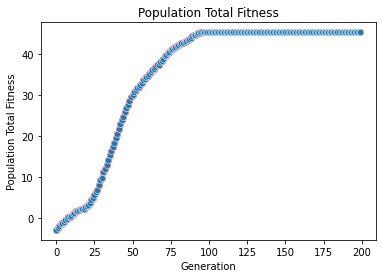

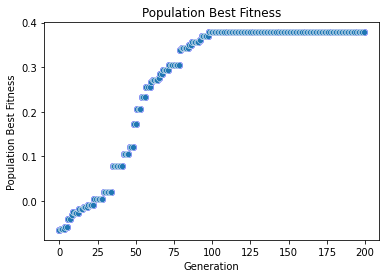

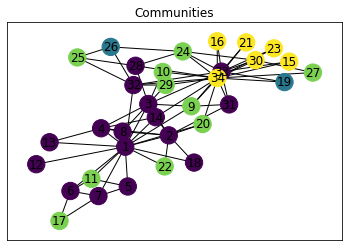

In [28]:
from google.colab import files 
uploaded = files.upload()
f = open('sample dataset.txt', 'r')
lines = f.readlines()

n = int(lines[0])
lines = lines[1:]

adj = [[] for _ in range(n)]
graph_edge = []

for edge in lines:
	edge = edge.split()
	graph_edge.append(edge)

	adj[int(edge[0]) - 1].append(int(edge[1]) - 1)
	adj[int(edge[1]) - 1].append(int(edge[0]) -1)
 
# Define problem parameters : Number of nodes, adjacency matrix, array of edges  and finlay number of communities
problem = Problem(n, adj, graph_edge, 7)


problem.GA(population_size = 200, tournament_size = 160, parents_size = 120, mutation_rate = 0.1, elite_size = 60, n_generations = 200)
